## <font color='DarkBlue'> Предобработка данных

### <font color='DarkBlue'> Изучение общей информации файлов с данными
- просмотр данных
- переименование столбцов - приведение к стилю snake_case
- проверка на пропуски
- просмотр отдельно по колонкам
    - проверка на соответствие типов данных
    - основные данные по числовым значениям
    - уникальные значения по строковым данным 
    - изучение возможных аномалий
- проверка на дубликаты

Для чтения файла импортируем библиотеку pandas, также нам понадобятся библиотеки numpy, matplotlib.pyplot, scipy.stats, seaborn

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth


In [2]:
! pip install phik


In [3]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [4]:
# Считываем файл с данными клиентов
data = pd.read_csv('bank_scrooge.csv')

In [5]:
"""
describe_column, функция для описания данных столбца:
- количество пропусков,
- уникальные значения для значений типа 'object
на вход подается столбец
"""
def describe_column(column):
    print('Тип данных:', column.dtypes)
    print(f'Количество пропусков: {column.isna().sum()}, в процентах {round(column.isna().sum()/column.shape[0]*100,2)}%')
    if column.dtypes == 'object':
        print('Уникальные значения столбца', column.sort_values().unique())
    print('Количество уникальных значений', column.sort_values().nunique())    
    print('Описание данных:')
    print(column.describe())
#для непрерывных переменных посмотрим их распределение
    if column.name in ['salary','balance','score','age','products','equity']:
        sns.histplot(x=column, data=data,stat ='density',common_norm=False, kde=True)
        plt.title(f'Распределение\n {dict[column.name]}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        sns.boxplot(x=column, data=data)
        plt.title(f'Boxplot\n {dict[column.name]}')
        plt.xlabel(dict[column.name])
        plt.grid(True)
        plt.show()
   
    print()

In [6]:
# словарь для удобства подписей данных
dict = {'user_id':'идентификатор пользователя',\
'score' : 'баллы кредитного скоринга',\
'city': 'город',\
'gender' : 'пол',\
'age': 'возраст',\
'equity': 'приблизительная оценка собственности клиента',\
'balance' : 'баланс на счёте',\
'products' : 'количество продуктов, которыми пользуется клиент',\
'is_credit_card' : 'есть ли кредитная карта',\
'is_activity' : 'был ли клиент активен последнее время',\
'salary' : 'заработная плата клиента',\
'is_churn' : 'уходит'}

In [7]:
# функция для просмотра файлов 

"""
на вход подается датафрейм, в теле функции вызывается функция describe_column
"""
def description_files(df):
    
    print(f'Изучим информацию')
    print()
    print('Посмотрим первые 5 строк')
    display(df.head(5))
    print()
    print('*'*50)
    print('Выведем информацию о типах данных')
    df.info()
    print()
    print('*'*50)
    print('Проверим пропуски')
    display(df.isna().sum())
    print('Пройдемся по значениям каждого столбца')
    print()
    print('*'*50)
    for column in df.columns:
        columnSeriesObj = df[column]
        print(f"столбец: {column}")
        print()
        describe_column(df[column])
        print() 
        
    print('Проверим дубликаты')
    if df.duplicated().sum() ==0:
        print('Явных дубликатов нет')
    else:
        print(f"Дубликатов: {df.duplicated().sum()},в процентах:{round(df.duplicated().sum()/df.shape[0]*100,2)} %")
        

Выведем названия колонок

In [8]:
data.columns.values

array(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype=object)

Приведем название колонок к стилю snake_case

In [9]:
data.columns = map(str.lower, data.columns)
data = data.rename(columns={'userid': 'user_id', 'credit_card':'is_credit_card','est_salary': 'salary','last_activity':'is_activity','churn':'is_churn'})

Изучим информацию

Посмотрим первые 5 строк


,user_id,score,city,gender,age,equity,balance,products,is_credit_card,is_activity,salary,is_churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1



**************************************************
Выведем информацию о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   score           10000 non-null  float64
 2   city            10000 non-null  object 
 3   gender          10000 non-null  object 
 4   age             10000 non-null  int64  
 5   equity          10000 non-null  int64  
 6   balance         7705 non-null   float64
 7   products        10000 non-null  int64  
 8   is_credit_card  10000 non-null  int64  
 9   is_activity     10000 non-null  int64  
 10  salary          10000 non-null  float64
 11  is_churn        10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB

**************************************************
Проверим пропуски


user_id              0
score                0
city                 0
gender               0
age                  0
equity               0
balance           2295
products             0
is_credit_card       0
is_activity          0
salary               0
is_churn             0
dtype: int64

Пройдемся по значениям каждого столбца

**************************************************
столбец: user_id

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 9927
Описание данных:
count     10000.00000
mean     171814.71260
std       33708.23812
min       94561.00000
25%      142810.25000
50%      172728.00000
75%      201261.75000
max      229145.00000
Name: user_id, dtype: float64


столбец: score

Тип данных: float64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 348
Описание данных:
count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64


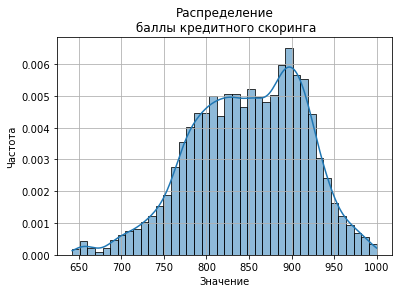

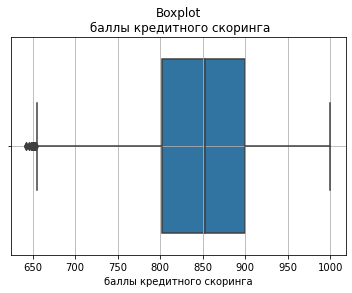



столбец: city

Тип данных: object
Количество пропусков: 0, в процентах 0.0%
Уникальные значения столбца ['Ростов' 'Рыбинск' 'Ярославль']
Количество уникальных значений 3
Описание данных:
count         10000
unique            3
top       Ярославль
freq           5906
Name: city, dtype: object


столбец: gender

Тип данных: object
Количество пропусков: 0, в процентах 0.0%
Уникальные значения столбца ['Ж' 'М']
Количество уникальных значений 2
Описание данных:
count     10000
unique        2
top           М
freq       5008
Name: gender, dtype: object


столбец: age

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 68
Описание данных:
count    10000.000000
mean        42.837100
std         12.128507
min         18.000000
25%         34.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: age, dtype: float64


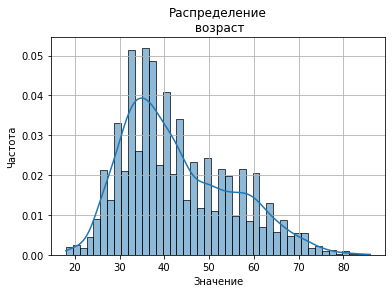

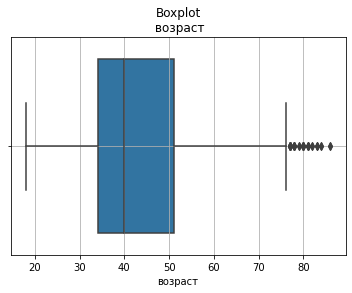



столбец: equity

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 10
Описание данных:
count    10000.000000
mean         2.627600
std          1.980836
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: equity, dtype: float64


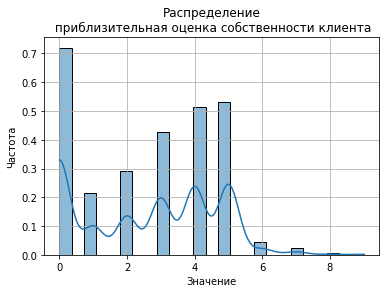

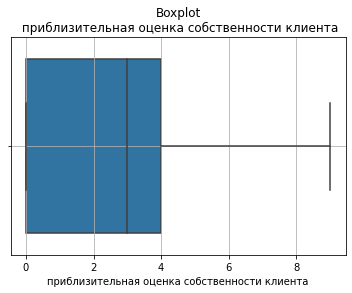



столбец: balance

Тип данных: float64
Количество пропусков: 2295, в процентах 22.95%
Количество уникальных значений 7701
Описание данных:
count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64


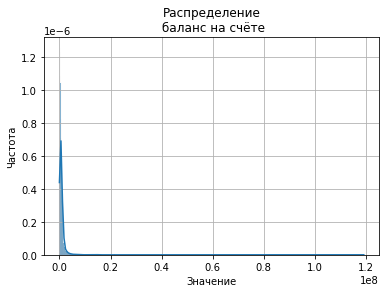

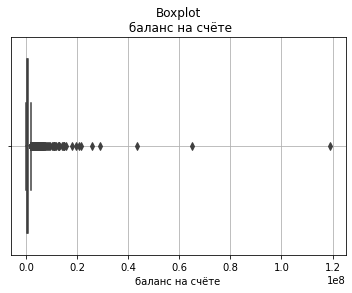



столбец: products

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 6
Описание данных:
count    10000.000000
mean         1.874100
std          0.799946
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64


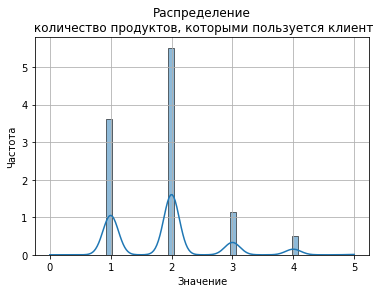

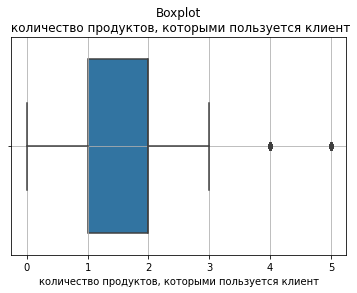



столбец: is_credit_card

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 2
Описание данных:
count    10000.000000
mean         0.680400
std          0.466345
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_credit_card, dtype: float64


столбец: is_activity

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 2
Описание данных:
count    10000.000000
mean         0.523500
std          0.499472
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_activity, dtype: float64


столбец: salary

Тип данных: float64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 9996
Описание данных:
count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e

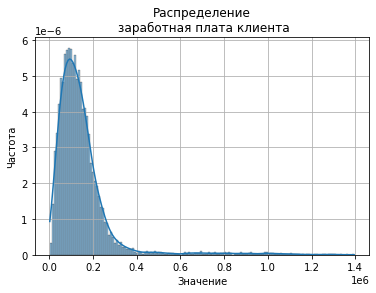

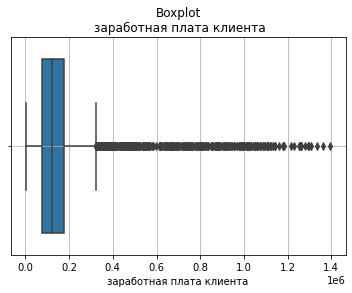



столбец: is_churn

Тип данных: int64
Количество пропусков: 0, в процентах 0.0%
Количество уникальных значений 2
Описание данных:
count    10000.000000
mean         0.182200
std          0.386029
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_churn, dtype: float64


Проверим дубликаты
Дубликатов: 1,в процентах:0.01 %


In [10]:
description_files(data)

<div style='border:solid blue 1px; padding: 10px'>    
<b> Изучение данных:</b>
     
- Имеем 10000 строк    
- Пропуски есть в столбце `balance` - 2295    
- Из 10000 записей - 9927 уникальные клиенты (вохможно клиенты имеют продукты в разных городах)       
- Столбец `score` содержит целые числа, можно поменять тип данных на int32. Балла скоринга от  642 до 1000, среднее практически совпадает с медианным (848 и 853), значит, выбросов практически нет    
- Городов действительно 3 (Ярославль, Рыбинск, Ростов), большинство клиентов из Ярославля (5906), что логично, так как в нем расположен главный офис 
- По полу клиенты распределены практически поровну, с небольшим перевесом в сторону мужчин (5008)   
- Возраст: минимальный 18 лет, максимальный 86, средний практически равен медианному, значит нет значительных выбросов (42.8 и 40 соответственно) 
- По оценке собственности клиенты деляться на 10 групп от 0 до 9 баллов, в среднем по 3 балла  
- Баланс на счете - `balance`   единственный столбец с пропусками (2295 пропусков - 23% данных). Баланс от 0 до 119 млн.руб 
    Надо посмотреть, как связаны пропуски с другими данными (например, с уходом клиента). ТАкже в этом столбце много выбросов.
- Минимальное количество банковских продуктов - 0. максимальное -5. Отсутствие банковских продуктов не соответствует логике. Клиенты без продуктов - не клиенты. Надо посчитать их количество.
    
- Кредитную карту имеет 68% клиентов
- Активными являются 52,4% клиентов
- Зарплата у клиентов от   2 546 руб до  1 395 064 руб
- Процент ушедших - 18,2%  
    
Выявлен один полный дубликат. Удалим его   
    
    

In [11]:
data_clean = data.drop_duplicates()

### <font color='DarkBlue'> Приведение данных к нужным форматам

In [12]:
data_clean['score'].copy= data_clean['score'].astype('int64')

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9999 non-null   int64  
 1   score           9999 non-null   float64
 2   city            9999 non-null   object 
 3   gender          9999 non-null   object 
 4   age             9999 non-null   int64  
 5   equity          9999 non-null   int64  
 6   balance         7705 non-null   float64
 7   products        9999 non-null   int64  
 8   is_credit_card  9999 non-null   int64  
 9   is_activity     9999 non-null   int64  
 10  salary          9999 non-null   float64
 11  is_churn        9999 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.5+ KB


### <font color='DarkBlue'> Заполнение пропусков

Пропуски есть только в одном столбце, но их много (23%). Посмотрим, как связаны пропуски с другими данными

In [14]:
""" 
функция подсчитывает процент строк с пропусками в балансе по общему числу строк с пропусками 
и по отношению к общему количеству строк в этом столбце 
"""
def get_share_balance_isna(column):
    
    data_not_balance = data_clean.loc[(data['balance'].isna())]
    if column in ['score','age','salary']:
        print(f"столбец: {column} - {dict[column]}")
        print()
        plt.figure(figsize=(10, 5))
        plt.title(f'Распределение данных в столбце {dict[column]}\n при наличи пропусков в балансе')
        sns.histplot(data=data_not_balance, x=column,stat ='density',common_norm=False, palette = 'husl')
        plt.xlabel(dict[column])
        plt.show()
        print('*'*50)
    elif column not in ['user_id','score','balance','age','salary']:
        print(f"столбец: {column} - {dict[column]}")
        print()
    #display(round(data_not_balance.groupby(column)['user_id'].count()/data_not_balance.shape[0]*100,2).sort_values().to_frame())
    #round(data_not_balance.groupby(column,dropna=True)['user_id'].count()/data_not_balance.shape[0]*100,2).sort_values().plot(kind='bar', xlabel=dict[column],ylabel='процент',figsize=(5,3))
        fig = plt.figure(figsize=(18,5))
        fig.suptitle(f'Соотношение строк с пропусками к общему числу строк с пропусками\nпо столбцу: {dict[column]}',y=1.05, fontsize = 14)
        ax1 = fig.add_subplot(121)
        ax1= round(data_not_balance.groupby(column,dropna=True)['user_id'].count()/data_not_balance.shape[0]*100,2).sort_values().plot(kind='bar', xlabel=dict[column],ylabel='процент пустых строк',figsize=(8,4))
        plt.xticks(rotation=0)
        df = round(data_not_balance.groupby(column)['user_id'].count()/data_not_balance.shape[0]*100,2).sort_values().reset_index()
        ax2 = fig.add_subplot(122)
        font_size=14
        bbox=[0, 0, 1, 1]
        ax2.axis('off')
        collabel=(column, "процент")
    
        mpl_table = ax2.table(cellText = df.values,  bbox=bbox, colLabels=collabel)
        mpl_table.auto_set_font_size(True)
        mpl_table.set_fontsize(font_size)
    #plt.title('Соотношение строк с пропусками к общему числу строк с пропусками\nстолбец',loc='left')
        plt.show()
        print('процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце')
        display((data_not_balance[column].value_counts(dropna=False)/data[column].value_counts()).sort_values().dropna().to_frame().style.format({column: '{:.2%}'.format}))
        print('*'*50)

In [15]:
# проверка функции 
#get_share_balance_isna('score')

столбец: score - баллы кредитного скоринга



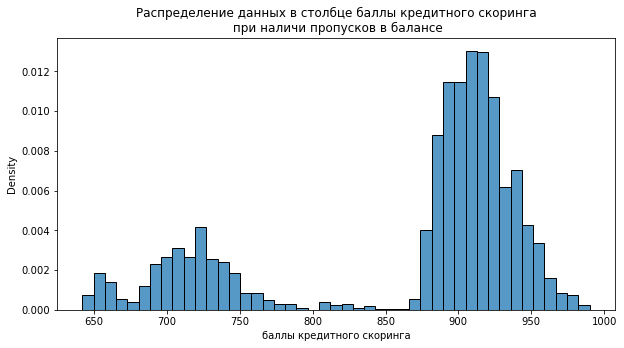

**************************************************
столбец: city - город



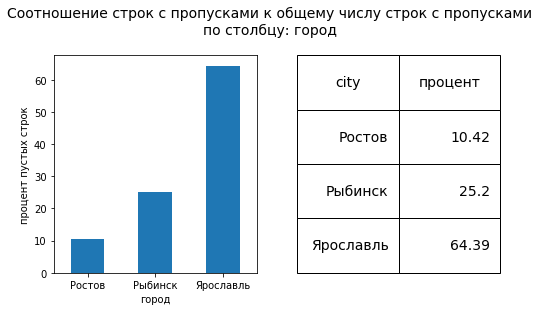

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,city
Ростов,16.70%
Рыбинск,21.70%
Ярославль,25.01%


**************************************************
столбец: gender - пол



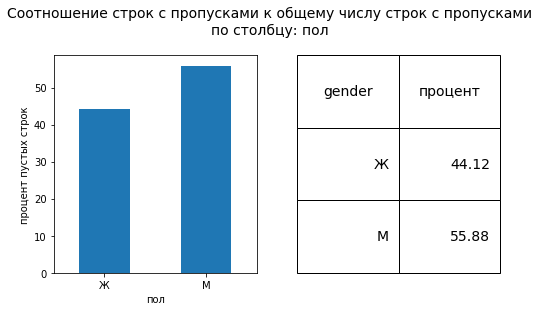

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,gender
Ж,20.27%
М,25.60%


**************************************************
столбец: age - возраст



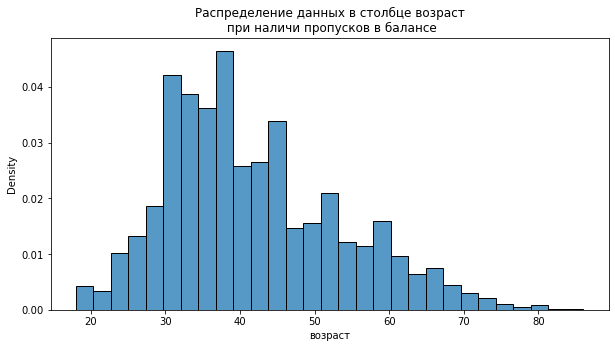

**************************************************
столбец: equity - приблизительная оценка собственности клиента



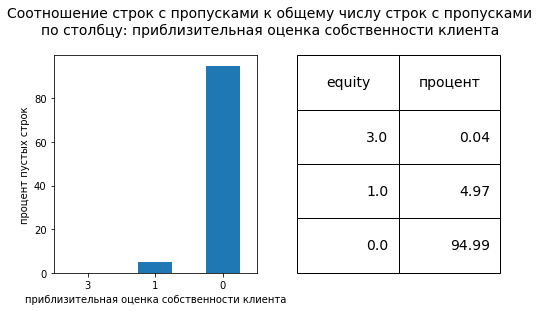

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,equity
3,0.06%
1,14.73%
0,84.07%


**************************************************
столбец: products - количество продуктов, которыми пользуется клиент



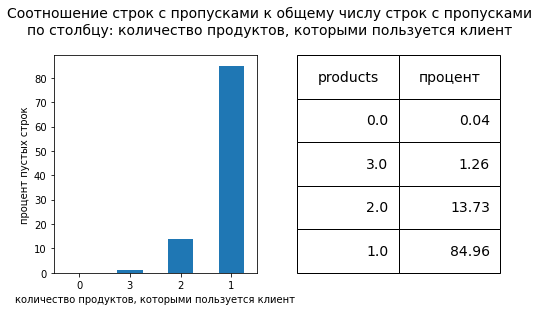

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,products
3,2.77%
2,6.17%
1,58.34%
0,100.00%


**************************************************
столбец: is_credit_card - есть ли кредитная карта



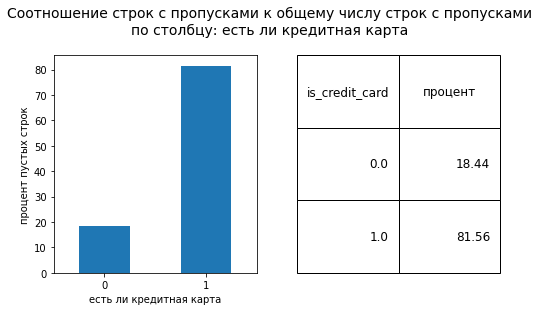

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,is_credit_card
0,13.24%
1,27.50%


**************************************************
столбец: is_activity - был ли клиент активен последнее время



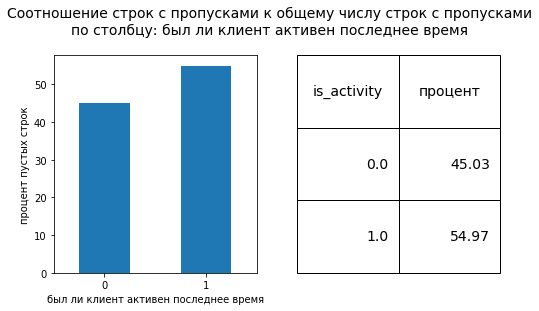

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,is_activity
0,21.68%
1,24.09%


**************************************************
столбец: salary - заработная плата клиента



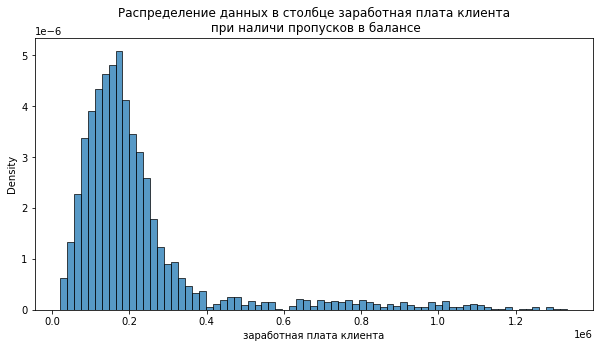

**************************************************
столбец: is_churn - уходит



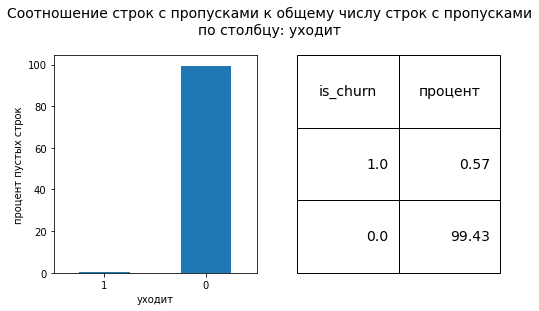

процент строк с пропусками в балансе по отношению к общему количеству строк в этом столбце


,is_churn
1,0.71%
0,27.89%


**************************************************


In [16]:
# посмотрим, как пропуски связаны с другими данными
for column in data_clean.columns.values:
    get_share_balance_isna(column)
    
    

<div style='border:solid blue 1px; padding: 10px'>    
<b> Вывод:</b>
    Отсутствие информации о балансе 
    
Можно отметить, что большая часть пропусков в балансе у клиентов:
- 99,4% у остающихся клиентов ( среди остающихся не заполнен баланс у 27,9%, тогда как среди ушедших меньше 1%),
- 95% у имеющих оценку собственности 0 (у 84% имеющих нулевую оценку отсутствуют данные по балансу), 4.97 у оценки 1 (у 14,7% имеющих оценку 1 отсутствуют данные по балансу)
- 85% у имеющих только 1 банковский продукт (у 58% клиентов, имеющих 1 банковский продукт, отсутствуют данные по балансу)
- 82% у имеющих кредитные карты (среди имеющих кредитные карты у 27,5% отсутстует информация о балансе)
- баллы кредитного скоринга у тех, у кого отсутствует информация о балансе ниже (большую часть от 850 до 950 или меньше 770) - заработная плата - меньше 400000  
- больше всего отсутствует информация о балансе у тех, кому от 30 до 45    
    
 Судя по данным можно предположить,что отсутствие информации о балансе по большей части связано с отсутствием у клиента собственности, наличием у клиента только одного продукта, а именно кредитной карты. Т.е. скорее всего баланс у таких клиентов должен быть отрицательным, но при выгрузке стал Nan. Восстановить пропуски не представляется возможным, для и восстанавливать его не надо, так как отсутствует баланс в 99,4% у оставшихся клиентов. При категорировании по балансу заменим пропуски на not_info

### <font color='DarkBlue'> Удаление дубликатов и аномалий

#### <font color='DarkBlue'> Удаление дубликатов 
Посмотрим, сколько повторяющихся пользователей

In [17]:
print(f"В датасете повторяются user_id {data_clean.duplicated(subset=['user_id']).sum()} ({round(data_clean.duplicated(subset=['user_id']).sum()/data_clean.shape[0]*100,2)} %) клиента с дублирующимися user_id")

В датасете повторяются user_id 72 (0.72 %) клиента с дублирующимися user_id


Один и тот же клиент может иметь продукты в разных городах, так же он мог уходить и возвращаться, поэтому посчитаем, сколько клиентов с одним id, в одном городе, с одним и тем же полом, возрастом и пометкой об уходе - таких клиентов будем считать дубликатами

In [18]:
print(f"В датасете есть {data_clean.duplicated(subset=['user_id','city','age','gender','is_churn']).sum()} ({round(data_clean.duplicated(subset=['user_id','city','age','gender','is_churn']).sum()/data_clean.shape[0]*100,2)}%) клиентов с дублированными данными user_id, городу, полу, возрасту и одним значением об уходе")

В датасете есть 15 (0.15%) клиентов с дублированными данными user_id, городу, полу, возрасту и одним значением об уходе


Удалим такие дубликаты

In [19]:
data_clean= data_clean.drop_duplicates(subset=['user_id','city','age','gender','is_churn'])

In [20]:
print(f"В датасете есть {data_clean.duplicated(subset=['user_id','city','age','gender']).sum()} ({round(data_clean.duplicated(subset=['user_id','city','age','gender']).sum()/data_clean.shape[0]*100,2)}%) клиентов c cовпадением по user_id, городу, полу и возрасту")

В датасете есть 1 (0.01%) клиентов c cовпадением по user_id, городу, полу и возрасту


In [21]:
duplicated = data_clean.groupby(['user_id','city','gender','age'])['score'].count().reset_index().query('score>=2')['user_id']

In [22]:
data_clean.query('user_id in @duplicated').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,is_credit_card,is_activity,salary,is_churn
8205,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Рыбинск,М,34,2,326593.14,2,1,0,103314.92,0


cовпадение по user_id, городу, полу и возрасту у 2 клиентов, так как нет уверенности, что это один и тот же клиент,или это клиент, который сначала ушел, потом вернулся, то добавим к user_id дубликата 1000000 (чтобы иметь возможность отфильтровать таких клиентов и user_id не попадет в уже задействованный диапазон )

In [23]:
print(f"В датасете повторяются user_id {data_clean.duplicated(subset=['user_id','city']).sum()} клиентов")

В датасете повторяются user_id 20 клиентов


Посмотрим оставшихся клиентов с совпадающими user_id и в одном городе

In [24]:
duplicated = data_clean.groupby(['user_id','city'])['score'].count().reset_index().query('score>=2')['user_id']

In [25]:
data_clean.query('user_id in @duplicated').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,is_credit_card,is_activity,salary,is_churn
1893,116540,883.0,Ярославль,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
1411,123461,829.0,Рыбинск,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9504,129785,949.0,Ярославль,М,43,0,NaN,1,1,1,166845.37,0
3988,129785,904.0,Ярославль,М,33,5,2427737.60,3,0,1,188856.75,1
904,131419,934.0,Ярославль,М,35,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.0,Ярославль,Ж,37,3,1307941.65,3,0,0,103867.47,0
5557,143592,764.0,Ярославль,Ж,68,3,508919.15,2,0,1,71211.66,0
5369,143592,885.0,Ярославль,Ж,56,4,1201087.46,2,1,1,88223.89,1


Можно заметить, что у данных клиентов отличается и возраст, и количество объектов и зарплаты, совпадающих параметров мало. Скорее всего произошла ошибка при выгрузке или присвоении user_id. Поменяем дубликатам user_id, прибавив 1000000

In [26]:
data_clean.loc[data_clean.duplicated(subset=['user_id']),'user_id']=data_clean.loc[data_clean.duplicated(subset=['user_id']),'user_id']+1000000

#### <font color='DarkBlue'> Удаление аномалий

Мы заметили, что минимальное количество продуктов - 0, но тогда это не клиент банка. Посмотрим, сколько таких клиентов

In [27]:
print(f"В датасете  {data_clean.query('products ==0').shape[0]} клиент(ов) без банковского продукта") 

В датасете  1 клиент(ов) без банковского продукта


Удалим этого клиента

In [28]:
data_clean= data_clean.query('products !=0')

In [29]:

print( "Удалили", data.shape[0] - data_clean.shape[0], 'строк, что составляет:', "{:.2%}".format(1- data_clean.shape[0]/data.shape[0]),)

Удалили 17 строк, что составляет: 0.17%


<div style='border:solid blue 1px; padding: 10px'>    
<b> <font color='DarkBlue'> Вывод:</b>
    
- Удалили одного клиента без продукта, так как такой клиент не может считаться полноценным клиентом банка
- Удалили дубликаты пользователей, когда совпадали данные по user_id, городу, полу, возрасту и метке об уходе
- Поменяли id клиентам у которых совпадал id и город  
- В общей сложности удалили 17 строк, то есть 0,17% данных     

## <font color='DarkBlue'> Исследовательский анализ данных

Так как предстоит посмотреть распределения клиентов по различным параметрам (полу,городу, возрасту, количеству объектов, по балансу счета,по количеству продуктов,по наличию кредитной карты,по активности, по заработной плате), а также связь этих параметров с уходом, то напишем соответствующую функцию и потом будем ее вызывать

In [30]:
# функция принимает параметр, по которому строить таблицу и график
def distribution(name):
    dict1={'gender':'полу', 'city': 'городам', 'age':'возрасту','age_cat':'возрасту',\
          'score':'кредитному скорингу',\
           'score_cat':'кредитному скорингу',\
        'equity':'оценке собственности','equity_cat':'оценке собственности', 'is_credit_card':'наличию кредитной карты',\
          'products':'количеству продуктов','is_activity':'активности',\
          'products_cat':'количеству продуктов','salary_cat':'заработной плате',\
          'salary':'заработной плате','balance':'балансу счета','balance_cat':'балансу счета'}
    dict['equity_cat']='оценка собственности'
    dict['products_cat']='количество продуктов'
    dict['score_cat'] = 'кредитный скоринг'
    dict['age_cat'] = 'возраст'
    dict['balance_cat'] ='баланс'
    dict['salary_cat']='заработная плата'
    #список для категориальных данных   
    list_cat=['gender', 'city', 'equity',\
              'age_cat',\
           'equity_cat','products_cat',\
              'score_cat','balance_cat',\
           'products','is_credit_card',\
          'is_activity','salary_cat']
    #список для непрерывных данных
    list_2=['score','salary','balance','age']
    # проверяем к каким данным относится наш параметр
    if name in list_cat:
    #группируем по заданному параметру, считаем количество клиентов и долю ушедших для категориальных данных
        klients = (data_clean.groupby(name)
        .agg({'user_id':'nunique', 'is_churn':'mean'})
        .sort_values(by='user_id')
        .rename(columns={'user_id': 'count_of_klients','is_churn':'share_of_churn'}))
        
        print(f'Распределение пользователей по {dict1[name]}')
        # выводим таблицу
        display(klients.style.format({'share_of_churn': '{:,.2%}'.format}))
        plt.figure(figsize=(15, 6))
        ax1 = plt.subplot(1, 2, 1)
        klients['count_of_klients'].plot(kind='pie',autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 3 else '',ax=ax1).set_ylabel('', color = 'blue')
        plt.xlabel(dict[name])
        plt.title(f'Распределение клиентов по {dict1[name]}',y=1.05)
        ax2 = plt.subplot(1, 2, 2)
        klients['share_of_churn'].sort_values(ascending=False).plot(kind='bar',grid = True, ax=ax2).set_ylabel('', color = 'blue')
        plt.xlabel(dict[name])
        plt.xticks(rotation=0)
        plt.title(f'Доля ушедших клиентов по {dict1[name]}',y=1.05);
        
    else:
        plt.figure(figsize=(15, 6))
        sns.histplot(data=data_clean, hue='is_churn',x=name,stat ='density',common_norm=False, palette = 'husl')
        plt.xlabel(dict[name]);

In [31]:
#distribution('gender')

In [32]:
df=data_clean[['salary','balance','gender','score','city','age','equity','products','is_credit_card','is_activity','is_churn']]

Построим матрицу корреляции и посмотрим, у каких параметров сильнее связь с уходом. Так как не все данные распределены нормально и есть категориальные переменные, то используем Phik

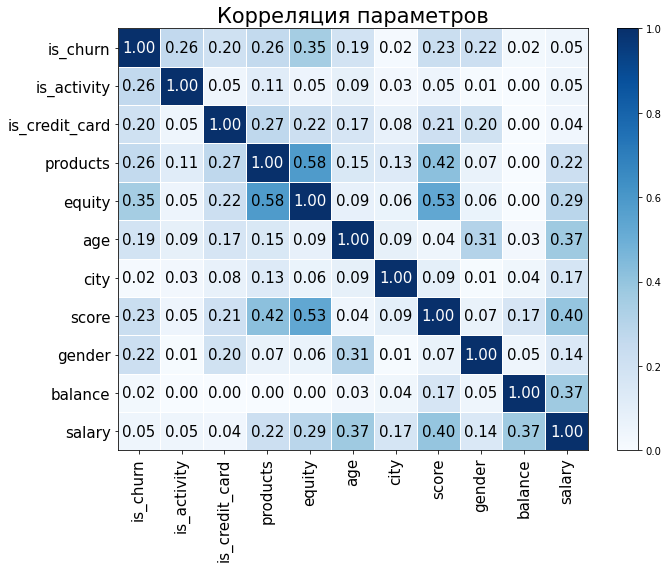

In [33]:
interval_cols = ['salary', 'balance', 'score', 'age', 'equity', 'products', 'is_credit_card', 'is_activity', 'is_churn']
phik_overview = df.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Корреляция параметров", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()


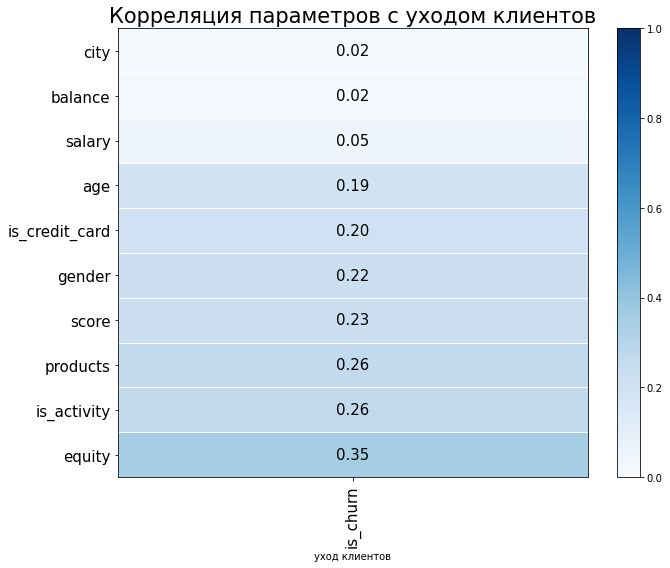

In [34]:

phik_overview = phik_overview .loc[:,['is_churn']].drop('is_churn').sort_values('is_churn',ascending=False)

plot_correlation_matrix(phik_overview.values, 
                        x_labels= phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Корреляция параметров с уходом клиентов",                        
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.xlabel("уход клиентов")
plt.tight_layout()


Баланс имеет слабую корреляцию с баллами скоринга
Сильнее всего уход связан с  оценкой собственности,активностью клиентов, количеством продуктов,баллами скоринга, полом и наличием кредитной карты. Но корреляции слабые и  очень слабые (По шкале Чеддока: 0 – полное отсутствие связи;
0 – 0.3 – очень слабая;
3 – 0.5 – слабая;
5 – 0.7 – средняя;
7 – 0.9 – высокая;
9 – 1 – очень высокая.
1 – абсолютная взаимозависимость.) 
Средняя корреляция наблюдается у оценки собственности и количеством продуктов (0.58), и баллами скоринга (0.53)

### <font color='DarkBlue'>Распределение пользователей 
#### <font color='DarkBlue'> Распределение пользователей по полу (Pie plot)
    - Связь с уходом (процент ушедших, влияние на уход)

Распределение пользователей по полу


,count_of_klients,share_of_churn
gender,,
Ж,4984,12.78%
М,4999,23.68%


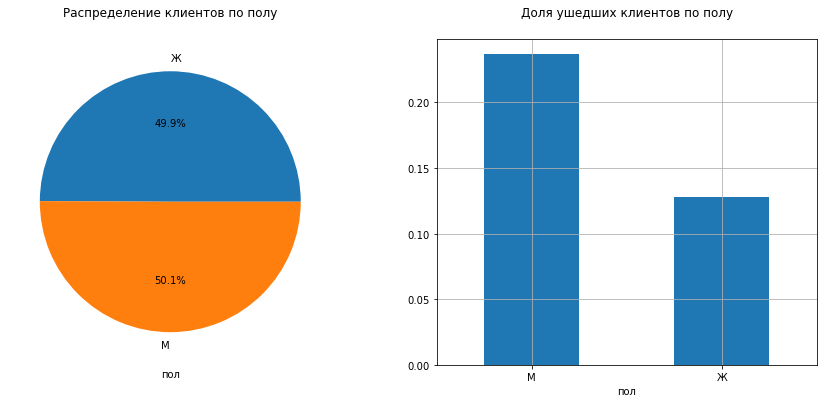

In [35]:
distribution('gender')

<div style='border:solid green 1px; padding: 10px'>    

В датасете мужчин и женщин практически поровну, доля ушедших среди мужчин в 2 раза выше, чем среди женщин

#### <font color='DarkBlue'> Распределение пользователей по городам (Pie plot)
     - Связь с уходом

Распределение пользователей по городам


,count_of_klients,share_of_churn
city,,
Ростов,1430,18.81%
Рыбинск,2660,16.20%
Ярославль,5893,19.02%


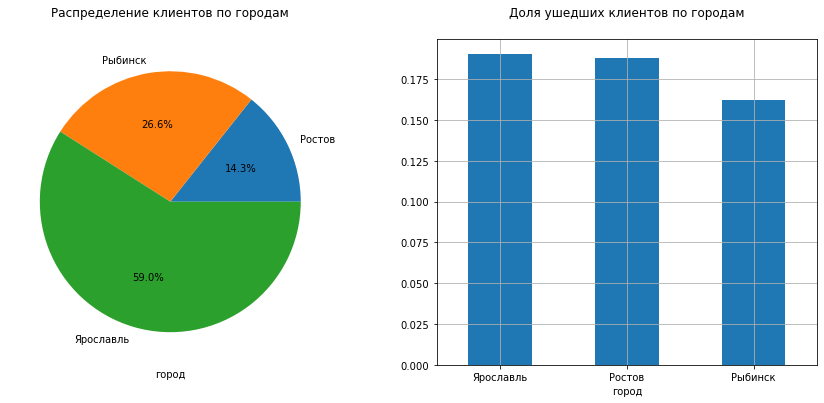

In [36]:
distribution('city')

<div style='border:solid green 1px; padding: 10px'>    
    Большая часть пользователей в датасете (59%) из Ярославля, уходят больше в Ярославле (19,2%) и Ростове (18,8%)

#### <font color='DarkBlue'>Распределение пользователей по кредитному скорингу (Гистограмма)
    - категорирование пользователей
    - Связь с уходом

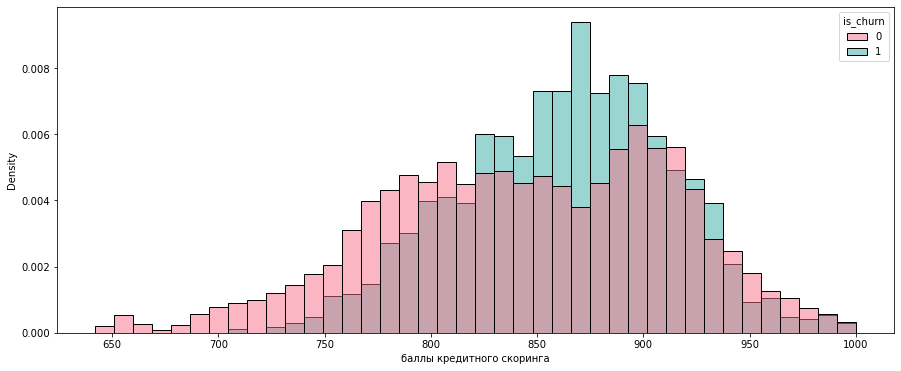

In [37]:
distribution('score')

<div style='border:solid green 1px; padding: 10px'>    
По гистограмме видно, что доля ушедших выше при скоринге от 850 до 905. Выделим соответствующие категории

In [38]:
data_clean['score_cat'] = pd.cut(data_clean.score,[642,849,905,1000],labels=['642-849','850-905','906-1000'])

Распределение пользователей по кредитному скорингу


,count_of_klients,share_of_churn
score_cat,,
906-1000,2138,17.35%
850-905,3013,25.72%
642-849,4830,13.98%


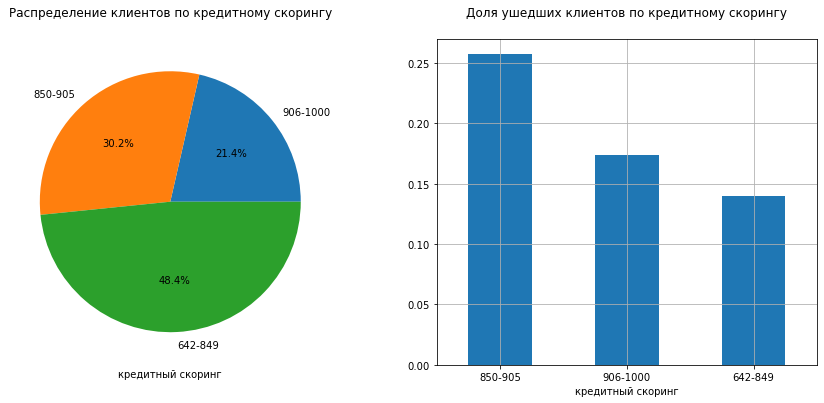

In [39]:
distribution('score_cat')

<div style='border:solid green 1px; padding: 10px'>    
Процент ухода среди клиентов, имеющих баллы кредитного скоринга в диапазоне от 850 до 905 самый высокий (25,7%)

#### <font color='DarkBlue'> Распределение пользователей по возрасту (Гистограмма)
    - Категорирование пользователей
    - Связь с уходом

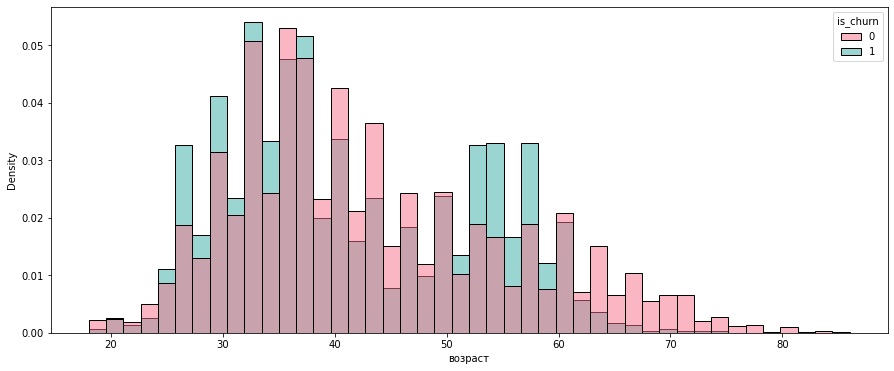

In [40]:
distribution('age')

<div style='border:solid green 1px; padding: 10px'>    
По возрасту чаще уходят клиенты 25-34 года, а также 51-59 лет. Выделим соответствующие категории

In [41]:
data_clean['age_cat'] = pd.cut(data_clean.age,[17,24,34,51,59,86],labels=['18-24','25-34','35-51','52-59','60-86'])

Распределение пользователей по возрасту


,count_of_klients,share_of_churn
age_cat,,
18-24,164,12.20%
60-86,1202,7.90%
52-59,1247,28.79%
25-34,2708,22.12%
35-51,4662,16.04%


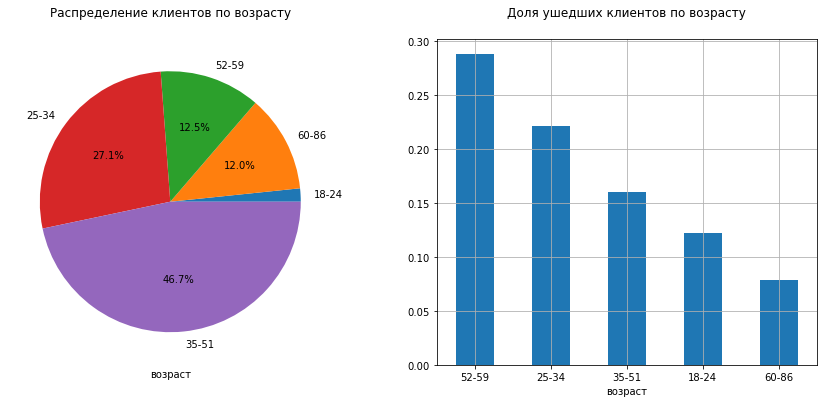

In [42]:
distribution('age_cat')

<div style='border:solid green 1px; padding: 10px'>    
Самый большой процент ухода (28.79%) в возрасте 52-59 лет и в 25-34 года (22.12%)

#### <font color='DarkBlue'> Распределение пользователей по оценке собственности (Pie plot)
    - Категорирование пользователей
    - Связь с уходом

Распределение пользователей по оценке собственности


,count_of_klients,share_of_churn
equity,,
9,13,53.85%
8,17,35.29%
7,80,46.25%
6,161,36.02%
1,774,12.02%
2,1052,15.78%
3,1542,20.88%
4,1849,25.15%
5,1917,30.10%


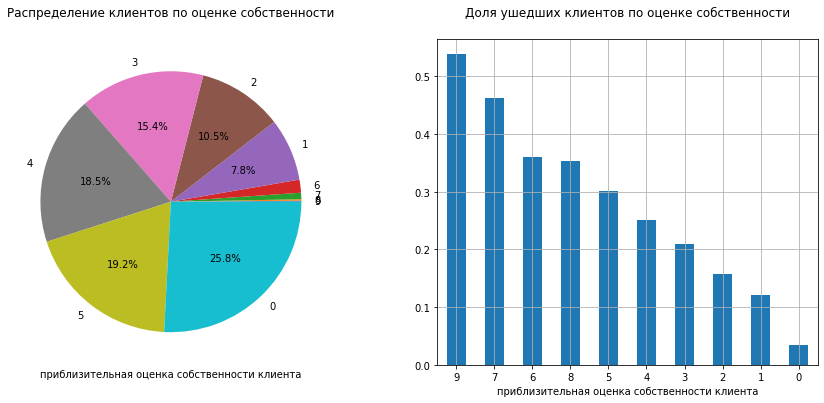

In [43]:
distribution('equity')

<div style='border:solid green 1px; padding: 10px'>   
    
- По оценке собственности 25,8% клиентов имеют нулевую оценку, уход среди этих клиентов самый маленький. 
- Максимальный процент ухода (53,8%) у клиентов, имеющих оценку собственности 9, но таких клиентов мало. 
- Объединим клиентов с 5 и более объектами в одну категорию    

In [44]:
data_clean['equity_cat'] = data_clean['equity'].where(data_clean['equity']<5,'5 и больше')

Распределение пользователей по оценке собственности


,count_of_klients,share_of_churn
equity_cat,,
1,774,12.02%
2,1052,15.78%
3,1542,20.88%
4,1849,25.15%
5 и больше,2188,31.31%
0,2578,3.49%


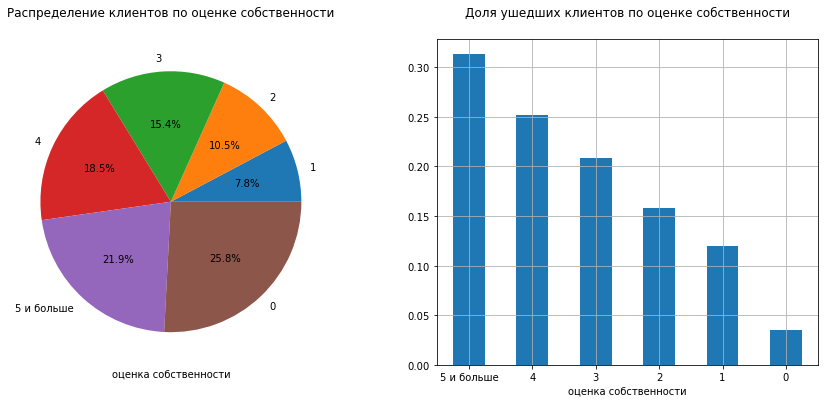

In [45]:
distribution('equity_cat')

<div style='border:solid green 1px; padding: 10px'>   
    
- Чем больше собственности у клиентов, тем чаще они уходят (31% ухода у тех, кто имеет оценку собственности 5 и более, против 0,3% у тех, у кого оценка 0)

#### <font color='DarkBlue'> Распределение пользователей по балансу счета  (Гистограмма)
    - Категорирование пользователей
    - Связь с уходом

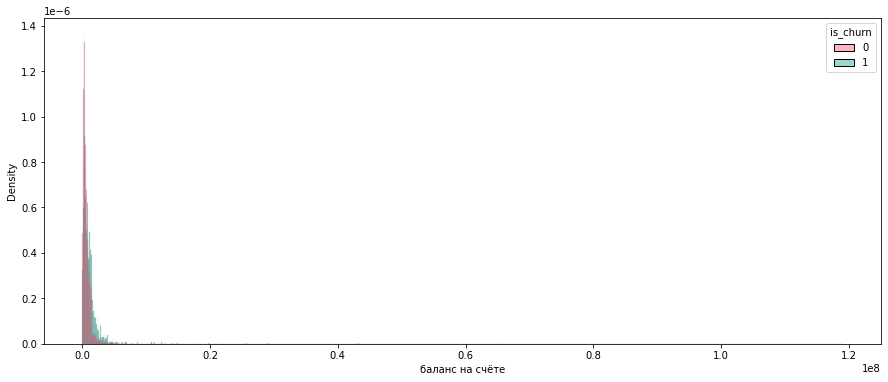

In [46]:
distribution('balance')

в балансе слишком большие выбросы, отбросим их

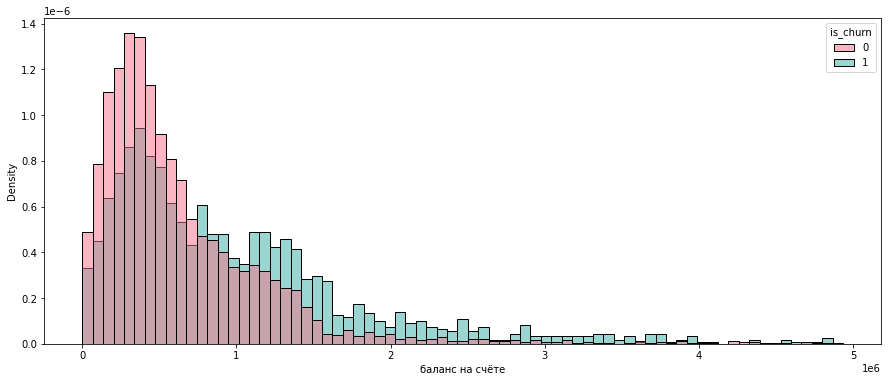

In [47]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data_clean.query('balance<5000000'), hue='is_churn',x='balance',stat ='density',common_norm=False, palette = 'husl')
plt.xlabel(dict['balance']);

Доля ушедших больше среди тех, у кого баланс выше 750000. Выделим категорию и не забудем про тех, у кого нет баланса

In [48]:
data_clean['balance_cat']= data_clean['balance'].apply(lambda x: ' <750000 ' if x < 750000 else ('>750000' if x >= 750000 else 'no_info'))

Распределение пользователей по балансу счета


,count_of_klients,share_of_churn
balance_cat,,
no_info,2280,0.53%
>750000,2703,34.81%
<750000,5000,17.36%


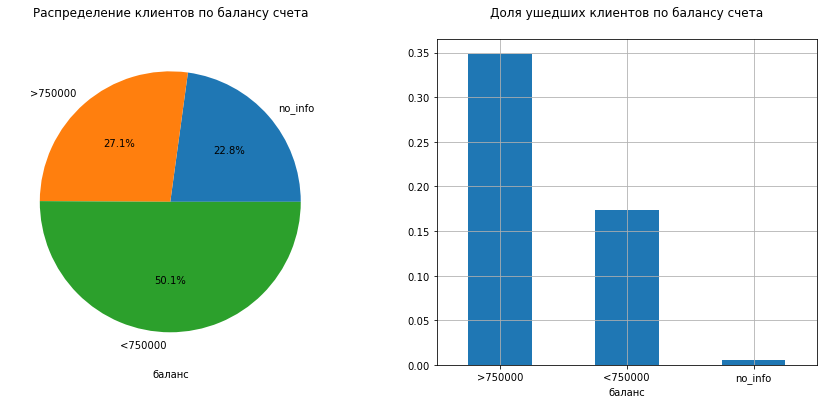

In [49]:
distribution('balance_cat')

<div style='border:solid green 1px; padding: 10px'>   
    
- больше ушедших (34.8%) среди тех, у кого баланс больше 750000), как мы уже выявляли, среди тех, у кого баланс не известен, ушедших практически нет.

#### <font color='DarkBlue'> Распределение пользователей по количеству продуктов (Pie plot)
    - Категорирование пользователей
    - Связь с уходом

Распределение пользователей по количеству продуктов


,count_of_klients,share_of_churn
products,,
5,30,30.00%
4,474,63.29%
3,1046,28.49%
1,3326,7.07%
2,5107,19.17%


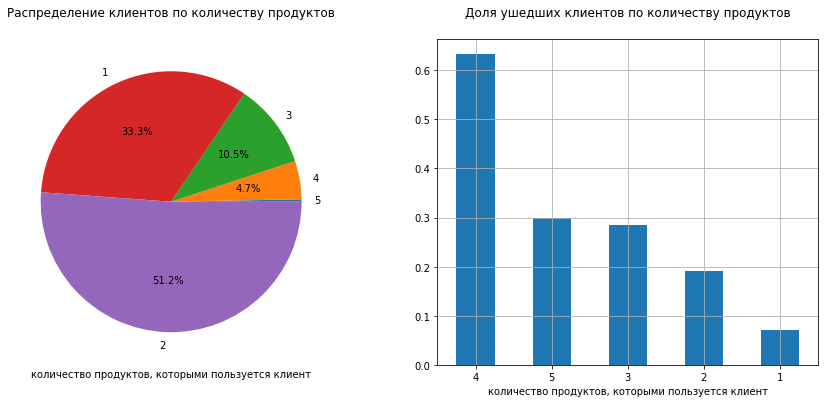

In [50]:
distribution('products')

<div style='border:solid green 1px; padding: 10px'>   
    
- Так как клиентов с  4 и 5 продуктами мало, объединим их в одну группу

In [51]:
 data_clean['products_cat'] = data_clean['products'].where(data_clean['products']<4,'4-5')

Распределение пользователей по количеству продуктов


,count_of_klients,share_of_churn
products_cat,,
4-5,504,61.31%
3,1046,28.49%
1,3326,7.07%
2,5107,19.17%


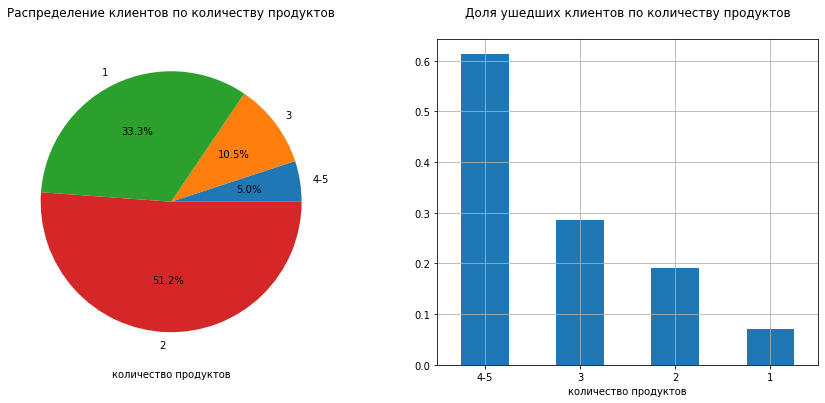

In [52]:
distribution('products_cat')

<div style='border:solid green 1px; padding: 10px'>   
    
- Больше всего клиентов с 2 продуктами
- Чем больше продуктов, тем чаще клиенты уходят, среди клиентов с 3-5 продуктами самый большой отток (61.3%)

#### <font color='DarkBlue'> Распределение пользователей по наличию кредитной карты (Pie plot)
    - Связь с уходом

Распределение пользователей по наличию кредитной карты


,count_of_klients,share_of_churn
is_credit_card,,
0,3193,25.62%
1,6790,14.77%


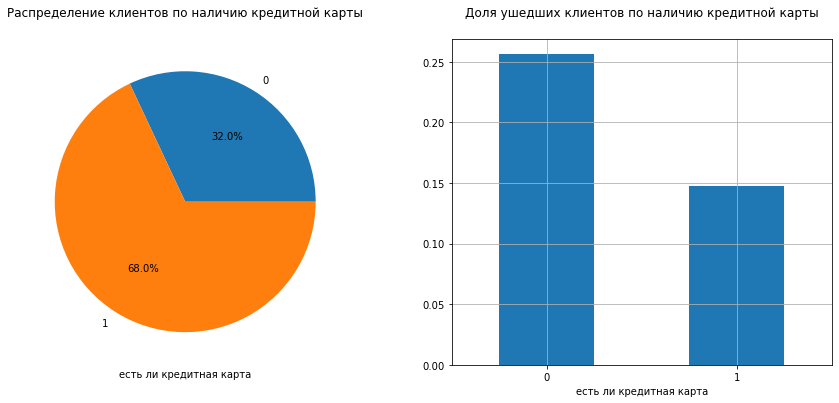

In [53]:
distribution('is_credit_card')

<div style='border:solid green 1px; padding: 10px'>   
Чаще уходят клиенты с кредитной картой (25.6% ушедших). Выше процент ушедших с кредитной картой можно объяснить тем, что просто не пользоваться кредитной картой может вызвать больше сложностей, чем закрытие кредитки

#### <font color='DarkBlue'> Распределение пользователей по активности (Pie plot)
    - Связь с уходом

Распределение пользователей по активности


,count_of_klients,share_of_churn
is_activity,,
0,4758,11.37%
1,5225,24.50%


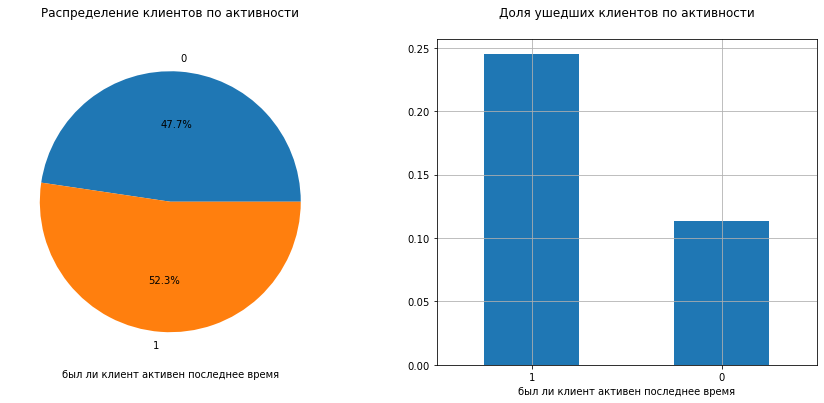

In [54]:
distribution('is_activity')

<div style='border:solid green 1px; padding: 10px'>   
    
- Активных клиентов немного больше (52,3% и 47,7%), чем неактивных, при этом активные в 2 раза чаще уходят, чем неактивные (24,5% против 11.37%). Это можно объяснить тем, что активные пользователи именно разрывают договор, а неактивные просто перестают пользоваться банком

#### <font color='DarkBlue'> Распределение пользователей по заработной плате  (Гистограмма)
    - Категорирование пользователей
    - Связь с уходом

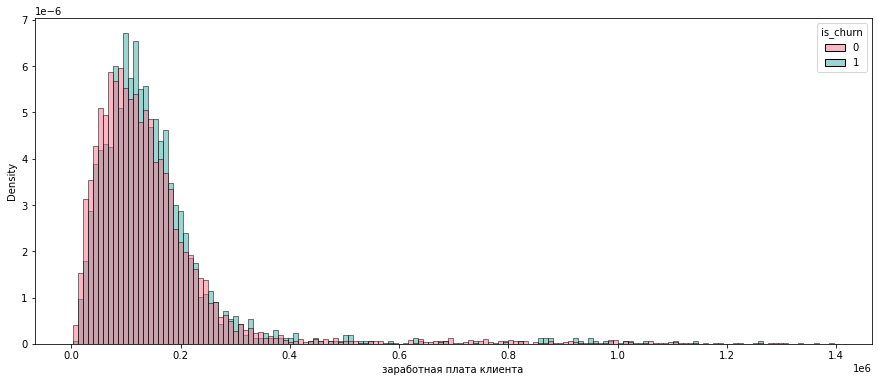

In [55]:
distribution('salary')

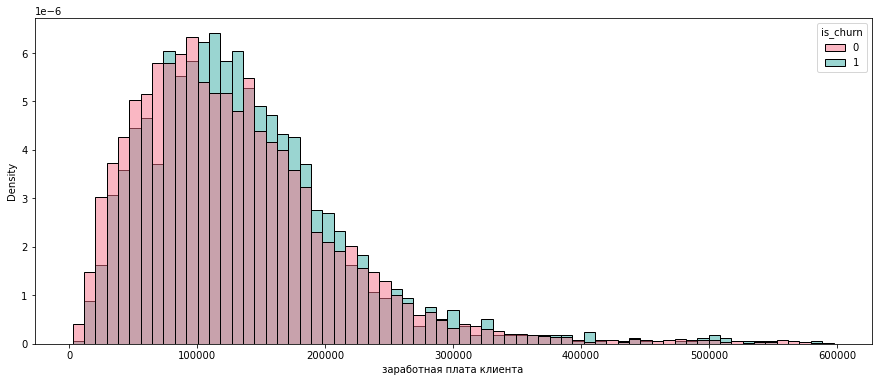

In [56]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data_clean.query('salary<600000'), hue='is_churn',x='salary',stat ='density',common_norm=False, palette = 'husl')
plt.xlabel(dict['salary']);

Доля ушедших больше среди клиентов с зарплатой от 100000 до 220000. Разделим на категории 

In [57]:
data_clean['salary_cat'] = pd.cut(data_clean.salary,[0,110000,220000,1400000])

Распределение пользователей по заработной плате


,count_of_klients,share_of_churn
salary_cat,,
"(220000, 1400000]",1342,17.21%
"(110000, 220000]",4166,20.52%
"(0, 110000]",4475,16.42%


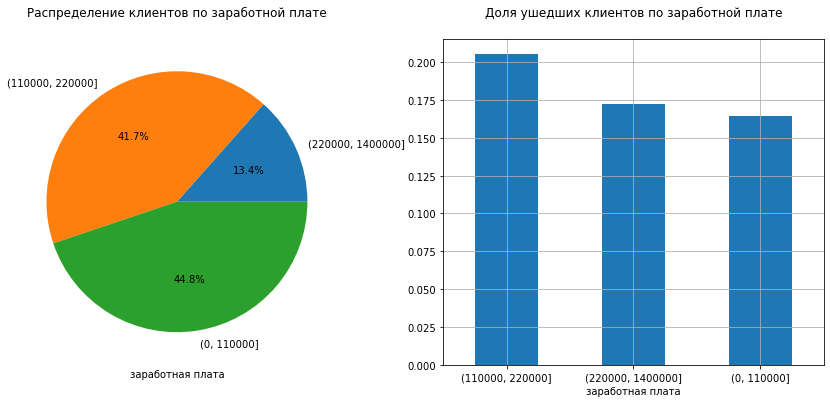

In [58]:
distribution('salary_cat')

<div style='border:solid green 1px; padding: 10px'>   
    
- Процент ушедших выше среди клиентов с зарабатной платой от 110тыс до 220 тыс - 20.52%

### <font color='DarkBlue'> Поиск сегментов уходящих пользователей

Больше всего уход связан с полом, количеством продуктов, оценкой собственности, балансом, активностью клиентов

Сразу проверим клиентов с 4-5 продуктами (504 клиента), у них  высокий процент оттока - 61.29%. 

In [59]:
(data_clean.query('products_cat =="4-5"') .groupby(['is_credit_card']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

,count_of_klients,count_churn
is_credit_card,,
1,342,0.713450
0,162,0.401235


- Первый сегмент  клиенты с 4-5 продуктами , с кредитной картой (342 клиента)- 71.3% оттока. 

In [60]:
segment_1 = data_clean.query('products_cat =="4-5" and is_credit_card ==1') 

In [61]:
# выделим отдельно id клиентов в первом сегменте, чтобы по ним фильтровать
segment_1_id = segment_1['user_id']

In [62]:
(data_clean.query('user_id not in @segment_1_id') .groupby(['gender','equity_cat','balance_cat','is_activity']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'})).head(10)

count_of_klients  count_churn
gender equity_cat balance_cat is_activity                               
М      0          >750000     1                           1     1.000000
       5 и больше >750000     1                         299     0.615385
       3          >750000     1                         112     0.517857
       4          >750000     1                         170     0.517647
       2          >750000     1                          39     0.461538
       5 и больше  <750000    1                         217     0.391705
Ж      4          >750000     1                         188     0.377660
       5 и больше >750000     1                         297     0.370370
М      4           <750000    1                         245     0.322449
                  >750000     0                         185     0.275676

- Второй сегмент: активные клиенты мужского пола с оценкой собственности 5 и выше, с балансом от 750000 рублей (281 клиент) - процент ушедших - 62,3

In [63]:
segment_2= data_clean.query('products_cat !="4-5" and gender == "М" and equity_cat == "5 и больше" and balance_cat == ">750000" and is_activity==1')

In [64]:
(segment_2.groupby(['is_credit_card']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

,count_of_klients,count_churn
is_credit_card,,
0,151,0.728477
1,130,0.500000


In [65]:
(segment_2.groupby(['age_cat']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

,count_of_klients,count_churn
age_cat,,
25-34,72,0.805556
52-59,47,0.702128
35-51,140,0.535714
60-86,22,0.409091
18-24,0,NaN


In [66]:
# выделим отдельно id клиентов во втором сегменте, чтобы по ним фильтровать
segment_2_id = segment_2['user_id']

In [67]:
# отфильтруем клиентов из сегмента 1 и 2 и поменяем группировки
(data_clean.query('user_id not in @segment_2_id and user_id not in @segment_1_id') .groupby(['city','is_activity','is_credit_card','score_cat']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'})).head(10)

,,,,count_of_klients,count_churn
city,is_activity,is_credit_card,score_cat,,
Ярославль,1,0,850-905,263,0.551331
Рыбинск,1,0,850-905,202,0.415842
Ярославль,1,0,906-1000,157,0.388535
Ростов,1,0,850-905,99,0.373737
Рыбинск,1,0,906-1000,93,0.344086
Ростов,1,1,850-905,79,0.329114
Ярославль,1,1,850-905,404,0.316832
Ростов,1,0,906-1000,47,0.255319
Ярославль,0,0,906-1000,193,0.233161


- Третий сегмент: активные клиенты в Ярославле с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (236 клиентов)  - процент ушедших - 58,5
- Четвертый сегмент: активные клиенты в Рыбинске с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (178 клиентов)  - процент ушедших - 42,7

In [68]:
segment_3= data_clean.query('(user_id not in @segment_2_id and user_id not in @segment_1_id) and city == "Ярославль" and score_cat == "850-905" and is_activity==1 and is_credit_card==0')

In [69]:
segment_4= data_clean.query('(user_id not in @segment_2_id and user_id not in @segment_1_id) and city == "Рыбинск" and score_cat == "850-905" and is_activity==1 and is_credit_card==0')

In [70]:
segment_3_id = segment_3['user_id']
segment_4_id = segment_4['user_id']

In [71]:
print('распределение в сегменте 3 по полу')
(segment_3.groupby(['gender']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

распределение в сегменте 3 по полу


,count_of_klients,count_churn
gender,,
Ж,178,0.561798
М,85,0.529412


In [72]:
print('распределение в сегменте 4 по полу')
(segment_4.groupby(['gender']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

распределение в сегменте 4 по полу


,count_of_klients,count_churn
gender,,
М,79,0.443038
Ж,123,0.398374


In [73]:
# отфильтруем клиентов из сегмента 1,2,3 и 4 и поменяем группировки
(data_clean.query('user_id not in @segment_2_id and user_id not in @segment_1_id and user_id not in @segment_3_id and user_id not in @segment_4_id')
 .groupby(['gender','age_cat','balance_cat']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'})).head(10)

count_of_klients  count_churn
gender age_cat balance_cat                               
М      52-59   >750000                   145     0.475862
       25-34   >750000                   191     0.418848
       52-59    <750000                  196     0.301020
Ж      25-34   >750000                   165     0.278788
       52-59   >750000                   177     0.254237
М      35-51   >750000                   508     0.244094
       60-86   >750000                    65     0.230769
       18-24    <750000                   61     0.229508
       25-34    <750000                  789     0.228137
Ж      52-59    <750000                  322     0.223602

- Пятый сегмент:  мужчины в возрасте 52-59 и балансом свыше 750000 (145)  - процент ушедших - 47.5

In [74]:
segment_5=data_clean.query('(user_id not in @segment_2_id and user_id not in @segment_1_id and user_id not in @segment_3_id and user_id not in @segment_4_id) and gender=="М" and age_cat == "52-59" and balance_cat == ">750000"')

In [75]:
segment_5_id = segment_5['user_id']

In [76]:
def get_segments(user_id):
    
    if user_id in list(segment_1_id):
           return 'сегмент 1'
    elif user_id in list(segment_2_id):
           return 'сегмент 2'   
    elif user_id in list(segment_3_id):
           return 'сегмент 3'    
    elif user_id in list(segment_4_id):
           return 'сегмент 4'  
    elif user_id in list(segment_5_id):
           return 'сегмент 5'       
    else:  return 'сегмент не определен'       

In [77]:
#get_segments(137658)

In [78]:
data_clean['segment'] = data_clean['user_id'].apply(get_segments)

In [79]:
(data_clean.groupby(['segment']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'share_of_churn'}))

,count_of_klients,share_of_churn
segment,,
сегмент 1,342,0.713450
сегмент 2,281,0.622776
сегмент 3,263,0.551331
сегмент 5,145,0.475862
сегмент 4,202,0.415842
сегмент не определен,8750,0.126171


In [80]:
# проверка пересечения пользователей
bad_clients = data_clean.groupby('user_id').agg({'segment' : 'nunique'}).reset_index().query('segment>1')['user_id']

bad_clients

Series([], Name: user_id, dtype: int64)

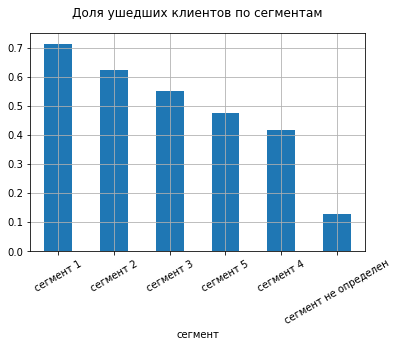

In [81]:
(data_clean.groupby(['segment']).agg({'user_id':'nunique', 'is_churn':'mean'})
    .sort_values(by='is_churn',ascending=False)
    .rename(columns={'user_id': 'count_of_klients','is_churn':'share_of_churn'}))['share_of_churn'].sort_values(ascending=False).plot(kind='bar',grid = True).set_ylabel('', color = 'blue')
plt.xlabel('сегмент')
plt.xticks(rotation=30)
plt.title(f'Доля ушедших клиентов по сегментам',y=1.05);

<div style='border:solid blue 1px; padding: 10px'>    
<b> <font color='DarkBlue'> Вывод: </b>
    
  Выделили 5 высокоотточных клиентов:
- Первый - клиенты с 4-5 продуктами , с кредитной картой (342 клиента)- 71.3% оттока.    
- Второй - активные клиенты мужского пола с оценкой собственности 5 и выше, с балансом от 750000 рублей (281 клиент) - процент ушедших - 62,3    
- Третий - активные клиенты в Ярославле с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (236 клиентов)  - процент ушедших - 58,5
- Четвертый - активные клиенты в Рыбинске с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (178 клиентов)  - процент ушедших - 42,7   
-  Пятый - мужчины в возрасте 52-59 и балансом свыше 750000 (145) - процент ушедших - 47.5   

## <font color='DarkBlue'> Проверка гипотез
- Доход клиентов влияет на уход;
- Кредитный рейтинг ушедших клиентов влияет на уход
- Город проживания влияет на уход клиента
- Пол клиента влияет на уход клиента

### <font color='DarkBlue'> Проверка гипотезы: доход клиентов влияет на уход
```
Нулевая гипотеза: средний доход ушедших клиентов равен среднему доходу оставшихся
Альтернативная гипотеза: средний доход ушедших клиентов меньше дохода оставшихся
alpha = 0.05
```
Нулевая гипотеза - односторонняя, так как нас интересует больше ли. 

In [82]:
#размер выборки для ушедших
len(data_clean[(data_clean['is_churn'] ==1)]['salary'])

1821

In [83]:
#размер выборки для оставшихся]
len(data_clean[(data_clean['is_churn'] ==0)]['salary'])

8162

Так как нам необходимо проверить одностороннюю гипотезу для независимых переменных (доход одних клиентов не влияет на доход оставшихся), Так как у нас имеются выбросы в заработной плате, то лучше использовать непараметрический тест Манна-Уитни

In [84]:
results = st.mannwhitneyu(data_clean[(data_clean['is_churn'] ==1)]['salary'].sort_values(),data_clean[(data_clean['is_churn'] ==0)]['salary'].sort_values(),True,'less')# ваш код
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.9999064330916392
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [85]:
results = st.ttest_ind(
    data_clean[(data_clean['is_churn'] ==1)]['salary'],
    data_clean[(data_clean['is_churn'] ==0)]['salary'],
    equal_var = False)  #вызов метода для проверки гипотезы

alpha = .01  #задаем значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.8543479368482916
Не получилось отвергнуть нулевую гипотезу


<div style='border:solid blue 1px; padding: 10px'>
    
<b> вывод:</b>  
Нулевую гипотезу о равенстве среднего дохода ушедших клиентов  среднему доходу оставшихся отвергнуть не удалось

### <font color='DarkBlue'> Проверка гипотезы: кредитный скоринг влияет на уход клиента
```
Нулевая гипотеза: средний кредитный скоринг ушедших клиентов равен среднему кредитному скорингу оставшихся
Альтернативная гипотеза: средний кредитный скоринг ушедших клиентов не равен среднему кредитному скорингу оставшихся
alpha = 0.05
```
Нулевая гипотеза - двусторонняя, так как нас интересует равенство 

In [86]:
#размер выборки для ушедших
len(data_clean[(data_clean['is_churn'] ==1)]['score'])

1821

In [87]:
#размер выборки для оставшихся]
len(data_clean[(data_clean['is_churn'] ==0)]['score'])

8162

Сильных выбросов в данных по скорингу нет. Так как нам необходимо проверить двустороннюю гипотезу для независимых переменных (скоринг пользователей не зависит от скоринга других пользователей), то используем метод st.ttest_ind. Выборки разного размера, поэтому equal_var = False

In [88]:
results = st.ttest_ind(
    data_clean[(data_clean['is_churn'] ==1)]['score'],
    data_clean[(data_clean['is_churn'] ==0)]['score'],
    equal_var = False)  #вызов метода для проверки гипотезы

alpha = .05  #задаем значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

9.713294332986508e-38
Отвергаем нулевую гипотезу


<div style='border:solid blue 1px; padding: 10px'>
    
<b> вывод:</b>  
Гипотезу о равенстве средних баллов скоринга у ушедших и оставшихся клиентов отвергли. Поэтому гипотеза о различии средних баллов скоринга у ушедших и оставшихся клиентов не отвергается. 

### <font color='DarkBlue'> Проверка гипотезы: Город проживания влияет на уход клиента
```
Нулевая гипотеза: В разных городах доля ушедших клиентов одинакова
Альтернативная гипотеза: В разных городах доля ушедших клиентов отличается
alpha = 0.05
```
Нулевая гипотеза - двусторонняя, так как нас интересует только равно или нет. Гипотеза множественная. Необходимо делать поправку на множественность, поправка равна 3, так как мы проводим 3 попарных сравнения

In [89]:
# функция для проверки гипотезы с помощью z-теста 
# (на вход подаем значения сравниваемых параметров, сам параметр и поправку Бонферрони, если необходимо)

def z_test(name_1,name_2, column, bonferroni=1):
    alpha = 0.05/bonferroni # для учета множественных сравнений
    klients = (data_clean.groupby(column)
    .agg({'user_id':'nunique', 'is_churn':'sum'})
    .sort_values(by='user_id')
    .rename(columns={'user_id': 'count_of_klients','is_churn':'count_churn'}))

    count_klients = [0,0]
    count_klients[0] = klients.loc[name_1,'count_of_klients']
    count_klients[1] =klients.loc[name_2,'count_of_klients']
    count_churn = [0,0]
    count_churn[0] =klients.loc[name_1,'count_churn']
    count_churn[1] = klients.loc[name_2,'count_churn']
    print(f'Число ушедших клиентов:  {name_1} - {count_churn[0] },  {name_2} - {count_churn[1] }')
        
# доля ушедших в первой группе:
    p1 = count_churn[0] /count_klients[0]
# доля ушедших во второй группе::
    p2 = count_churn[1] /count_klients[1]
    print(f'Доля ушедших клиентов:  {name_1} - {round(p1,2)},  {name_2}- {round(p2,2)}.')
# пропорция ушедших в комбинированном датасете:
    p_combined = (count_churn[0] + count_churn[1]) / (count_klients[0] + count_klients[1])

# разница пропорций в датасетах
    difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/count_klients[0] + 1/count_klients[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        print()
    else:
        print( 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()

In [90]:
z_test("Ростов","Ярославль",'city',3)

Число ушедших клиентов:  Ростов - 269,  Ярославль - 1121
Доля ушедших клиентов:  Ростов - 0.19,  Ярославль- 0.19.
p-значение:  0.8549137972397034
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [91]:
z_test("Ростов","Рыбинск",'city',3)

Число ушедших клиентов:  Ростов - 269,  Рыбинск - 431
Доля ушедших клиентов:  Ростов - 0.19,  Рыбинск- 0.16.
p-значение:  0.0347008485448026
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [92]:
z_test("Ярославль","Рыбинск",'city',3)

Число ушедших клиентов:  Ярославль - 1121,  Рыбинск - 431
Доля ушедших клиентов:  Ярославль - 0.19,  Рыбинск- 0.16.
p-значение:  0.0017361042405050764
Отвергаем нулевую гипотезу: между долями есть значимая разница




<div style='border:solid blue 1px; padding: 10px'>
    
<b> Вывод:</b>  
Город проживания влияет на уход клиента, но значимая разница обнаружена только между городами Ярославль и Рыбинск. Между Ярославлем и Ростовом, а также Ростовом и Рыбинском значимой разницы не обнаружено

### <font color='DarkBlue'> Проверка гипотезы: Пол влияет на уход клиента
```
Нулевая гипотеза: Среди мужчин и женщин  доля уходящих клиентов одинакова
Альтернативная гипотеза: Среди мужчин и женщин  доля уходящих клиентов отличается
alpha = 0.05
```
Нулевая гипотеза - двусторонняя, так как нас интересует только равно или нет. 

In [93]:
z_test("М","Ж",'gender')

Число ушедших клиентов:  М - 1184,  Ж - 637
Доля ушедших клиентов:  М - 0.24,  Ж- 0.13.
p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница




<div style='border:solid blue 1px; padding: 10px'>
    
<b> Вывод:</b>  
Разница между долями ушедших среди мужчин и женщин значима. Нулевую гипотезу отвергаем

In [94]:
#сохранение обработанных данных в файл
#data_clean.to_csv('data_clean.scv')

## <font color='DarkBlue'> Выводы и рекомендации

 <div style='border:solid blue 2px; padding: 20px'>
    
<b> Вывод:</b>  
    
 Выделили 5 высокоотточных клиентов:
- Первый - клиенты с 4-5 продуктами , с кредитной картой (342 клиента)- 71.3% оттока.    
- Второй - активные клиенты мужского пола с оценкой собственности 5 и выше, с балансом от 750000 рублей (281 клиент) - процент ушедших - 62,3    
- Третий - активные клиенты в Ярославле с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (236 клиентов)  - процент ушедших - 58,5
- Четвертый - активные клиенты в Рыбинске с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (178 клиентов)  - процент ушедших - 42,7   
-  Пятый - мужчины в возрасте 52-59 и балансом свыше 750000 (145) - процент ушедших - 47.5   

По результатам проверки гипотез:
- не смогли отвергнуть гипотезу о равенстве средних заработных плат ушедших клиентов
- Гипотезу о равенстве средних баллов скоринга у ушедших и оставшихся клиентов отвергли. Поэтому гипотеза о различии средних баллов скоринга у ушедших и оставшихся клиентов не отвергается.
- Город проживания влияет на уход клиента, но значимая разница обнаружена только между городами Ярославль и Рыбинск. Между Ярославлем и Ростовом, а также Ростовом и Рыбинском значимой разницы не обнаружено
- Разница между долями ушедших среди мужчин и женщин значима. Нулевую гипотезу о равенстве средней доли ушедщих среди женщин и мужчин отвергли



 <div style='border:solid blue 2px; padding: 20px'>
    
<b> Рекомендации:</b>  
    
 Выделили 5 высокоотточных клиентов:
- По первому сегменту  - клиенты с 4-5 продуктами , с кредитной картой (342 клиента)-  проверить качество продуктов (проверить данные с какими именно продуктами клиенты остаются, после приобретения каких продуктов отваливаются), особенно кредитной карты
- Второй - активные клиенты мужского пола с оценкой собственности 5 и выше, с балансом от 750000 рублей (281 клиент) - таким клиентам можно предложить улучшенный сервис обслуживания (например, Vip, увеличенный процент за более долгих срок вклада)
- Третий - активные клиенты в Ярославле с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (236 клиентов) - проверить работу отделов кредитования, возможно, слишком навязчивое предложение кредитной карты заставляет уйти  
- Четвертый - активные клиенты в Рыбинске с баллами кредитного скоринга от 850 до 905 включительно, без кредитной карты (178 клиентов) - проверить работу отделов кредитования, возможно, слишком навязчивое предложение кредитной карты заставляет уйти  
-  Пятый - мужчины в возрасте 52-59 и балансом свыше 750000 (145) - мужчины предпенсионного возраста, предложить специальный накопительный счет с повышенным процентом 

- Уделить внимание клиентам мужского пола, которые уходят чаще женщин
- Уделить внимание кредитным картам (клиенты с ней уходят, если у них много продуктов, а в Ярославле и Рыбинске уходят клиенты без кредитки)    


